In [35]:
from skimage.io import imshow, imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import closing
from skimage.measure import label, regionprops, regionprops_table
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import os

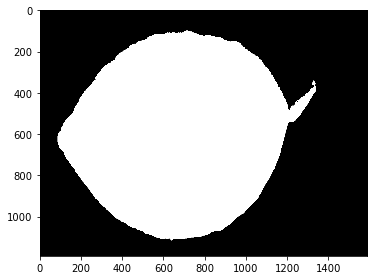

In [36]:
# get the filenames of the leaves under the directory “Leaves”
image_path_list = os.listdir("input/Lemon")
# looking at the first image
i = 21
image_path = image_path_list[i]
image = rgb2gray(imread("input/Lemon/"+image_path))
imshow(image)

c:\Users\Bagus\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


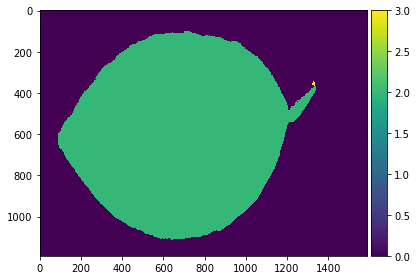

In [37]:
label_img = label(image)
imshow(label_img)

In [38]:
label_img.shape

(1191, 1590)

In [39]:
table = pd.DataFrame(regionprops_table(label_img, image,
                                       ['convex_area', 'area',
                                        'eccentricity', 'extent',                   
                                        'inertia_tensor',
                                        'major_axis_length', 
                                        'minor_axis_length']))
table['convex_ratio'] = table['area']/table['convex_area']
table['label'] = image_path[:]
table.loc[1:]

,convex_area,area,eccentricity,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,major_axis_length,minor_axis_length,convex_ratio,label
1,868434,828913,0.459544,0.651246,73163.908029,5025.753856,5025.753856,60933.297504,1095.182937,972.691947,0.954492,CL-S-022.png
2,293,268,0.833012,0.714667,14.143392,-6.752910,-6.752910,38.842991,25.477419,14.095505,0.914676,CL-S-022.png


In [40]:
table['label'] = image_path[0:2]
table['label']

0    CL
1    CL
2    CL
Name: label, dtype: object

In [41]:
label_img.shape

(1191, 1590)

In [44]:
image_path_list = os.listdir("input/Lemon")
df = pd.DataFrame()
for i in range(len(image_path_list)):
    image_path = image_path_list[i]
    image = rgb2gray(imread("input/Lemon/"+image_path))
    label_img = label(image)
    
    table = pd.DataFrame(regionprops_table(label_img, image,
                            ['area', 'eccentricity',                         
                             'major_axis_length', 'minor_axis_length']))
    table['label'] = image_path[0:2]
        
    if (i!=21):
        table = table.iloc[[-1]]
    else :
        table = table.iloc[[1]]
        
    
    df = pd.concat([df, table], axis=0)

df.reset_index(inplace=True)
df.drop('index', axis = 1, inplace=True)
df

,area,eccentricity,major_axis_length,minor_axis_length,label
0,675223,0.649895,1067.429240,811.272296,CL
1,822393,0.624533,1161.090534,906.809955,CL
2,659563,0.551006,1007.218875,840.525577,CL
3,615677,0.614825,1009.391084,796.070013,CL
4,778677,0.575323,1105.284678,904.041728,CL
5,700597,0.472203,1012.239904,892.279314,CL
6,827460,0.580077,1139.221454,927.966221,CL
7,536600,0.718340,1004.012762,698.483609,CL
8,655900,0.645120,1049.184479,801.661884,CL
9,720217,0.572189,1062.362178,871.266610,CL


In [43]:
from pathlib import Path  
filepath = Path('csv/lemon.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath, index=False)  